## Exploratory Data Analysis

***

1. Import package
2. Loading data with Pandas
3. Descriptive Statistics
4. Data Visualization

1. Import packages

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime
from datetime import date, timedelta


%matplotlib inline

sns.set(color_codes=True)
pd.set_option('display.max_columns', 100)

2. Loading data with Pandas

In [111]:
df = pd.read_excel('ANZ synthesised transaction dataset.xlsx')

In [112]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

3. Descriptive Analysis

In [114]:
df.describe(datetime_is_numeric=True)

,card_present_flag,merchant_code,balance,date,age,amount
count,7717.000000,883.0,12043.000000,12043,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,2018-09-15 21:27:39.951839232,30.582330,187.933588
min,0.000000,0.0,0.240000,2018-08-01 00:00:00,18.000000,0.100000
25%,1.000000,0.0,3158.585000,2018-08-24 00:00:00,22.000000,16.000000
50%,1.000000,0.0,6432.010000,2018-09-16 00:00:00,28.000000,29.000000
75%,1.000000,0.0,12465.945000,2018-10-09 00:00:00,38.000000,53.655000
max,1.000000,0.0,267128.520000,2018-10-31 00:00:00,78.000000,8835.980000
std,0.398029,0.0,31503.722652,NaN,10.046343,592.599934


In [115]:
df.describe(include='object')

,status,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,first_name,gender,merchant_suburb,merchant_state,extraction,transaction_id,country,customer_id,merchant_long_lat,movement
count,12043,885,12043,12043,12043,12043,7717,12043,12043,7717,7717,12043,12043,12043,12043,7717,12043
unique,2,3,100,1,100,6,5725,80,2,1609,8,9442,12043,1,100,2703,2
top,authorized,0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,106e1272-44ab-4dcb-a438-dd98e0071e51,Michael,M,Melbourne,NSW,2018-09-03T11:00:00.000+0000,60289954e1f240fd87b37c6de51b3a6e,Australia,CUS-2487424745,151.21 -33.87,debit
freq,7717,883,578,12043,578,3934,14,746,6285,255,2169,10,1,12043,578,145,11160


In [116]:
df.isna().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [117]:
df['date'].nunique()

91

In [118]:
dates = df['date'].to_list()
date_set = set(dates[0] + timedelta(x) for x in range((dates[-1] - dates[0]).days))
missing = sorted(date_set - set(dates))
missing

[Timestamp('2018-08-16 00:00:00')]

In [119]:
df['extraction'] = df['extraction'].apply(lambda x : datetime.datetime.strptime(x,"%Y-%m-%dT%H:%M:%S.%f+0000"))

In [120]:
df['hour'] = df['extraction'].dt.hour

In [121]:
df['weekday'] = df['extraction'].dt.isocalendar().day

In [122]:
df.nunique()

status                   2
card_present_flag        2
bpay_biller_code         3
account                100
currency                 1
long_lat               100
txn_description          6
merchant_id           5725
merchant_code            1
first_name              80
balance              12006
date                    91
gender                   2
age                     33
merchant_suburb       1609
merchant_state           8
extraction            9442
amount                4457
transaction_id       12043
country                  1
customer_id            100
merchant_long_lat     2703
movement                 2
hour                    24
weekday                  7
dtype: int64

In [123]:
df.groupby('account')['customer_id'].apply(lambda x: x.nunique() == 1).all()

True

In [124]:
df['amount']

0        16.25
1        14.19
2         6.42
3        40.90
4         3.25
         ...  
12038     9.79
12039    63.87
12040    43.96
12041    30.77
12042    22.36
Name: amount, Length: 12043, dtype: float64

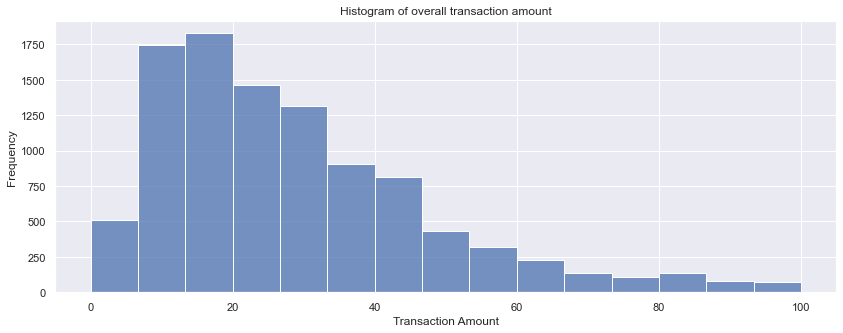

In [125]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.histplot(df['amount'], binrange=[0, 100], bins=15, ax=ax)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Histogram of overall transaction amount')
plt.show()

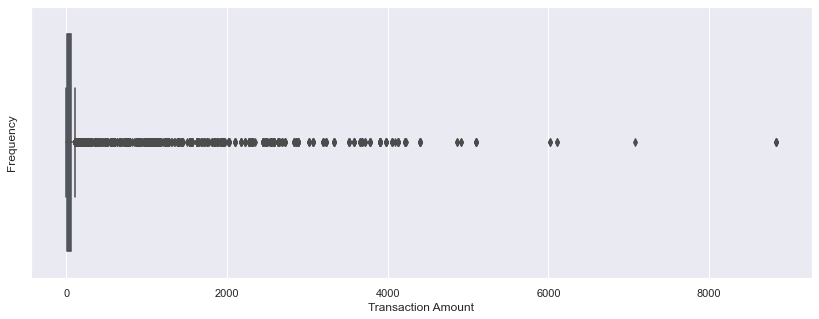

In [126]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.boxplot(data=df, x='amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

In [127]:
df.txn_description.unique()

array(['POS', 'SALES-POS', 'PAYMENT', 'INTER BANK', 'PAY/SALARY',
       'PHONE BANK'], dtype=object)

In [128]:
df[df['txn_description'] == 'POS']

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,hour,weekday
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01 01:01:15,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,1,3
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01 01:26:15,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,1,3
7,authorized,1.0,NaN,ACC-2776252858,AUD,144.95 -37.76,POS,ee58145d-26e8-4b01-9cd9-62378014f21d,NaN,Kristin,1232.75,2018-08-01,F,43,Melbourne,VIC,2018-08-01 04:11:25,15.61,e1c4a50d6a0549cbb3710a62a2fa00d5,Australia,CUS-4123612273,144.96 -37.81,debit,4,3
8,authorized,1.0,NaN,ACC-182446574,AUD,116.06 -32.00,POS,cfbf535e-caa8-499f-9d41-bbdc2b836d85,NaN,Tonya,213.16,2018-08-01,F,27,Yokine,WA,2018-08-01 04:40:00,19.25,799e39eb2c1b411185424b0f2cd18bda,Australia,CUS-3026014945,115.85 -31.9,debit,4,3
15,authorized,1.0,NaN,ACC-1903037542,AUD,153.05 -27.61,POS,d920de7f-959c-4d9a-aee5-930689a2f8cd,NaN,Jeffrey,2.85,2018-08-01,M,30,Mount Ommaney,QLD,2018-08-01 07:20:48,10.79,28347ba260d84f8d81ab70d9e901ea8e,Australia,CUS-860700529,152.94 -27.55,debit,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12018,authorized,1.0,NaN,ACC-3100725361,AUD,145.73 -17.03,POS,3d5cd451-fdd7-4eae-9494-d9866e8cdedf,NaN,Ronald,10471.98,2018-10-31,M,25,Smithfield,QLD,2018-10-31 19:44:28,34.31,c43b9e087328441ea2ddac6056ce5e96,Australia,CUS-2178051368,145.7 -16.81,debit,19,3
12019,authorized,1.0,NaN,ACC-53508546,AUD,150.62 -33.76,POS,e42055f4-e6a9-4915-9936-035981fd3de2,NaN,Kimberly,7036.56,2018-10-31,F,35,North Ryde,NSW,2018-10-31 19:57:37,70.58,7830702140b44d03af6d33ee79a9c6f1,Australia,CUS-72755508,151.12 -33.79,debit,19,3
12034,authorized,1.0,NaN,ACC-1516130869,AUD,130.84 -12.45,POS,7a3610ce-2f3c-4c7f-becf-987ddeb1c533,NaN,Jessica,4946.62,2018-10-31,F,21,Darwin City,NT,2018-10-31 22:51:45,23.48,74b737841b9548b494af32ba71627716,Australia,CUS-325142416,130.84 -12.46,debit,22,3
12038,authorized,0.0,NaN,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,14054.14,2018-10-31,F,30,Ringwood,VIC,2018-10-31 23:09:06,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit,23,3


In [129]:
df['purchase'] = df['txn_description'].apply(lambda x: x == 'POS' or x == 'SALES-POS')

In [130]:
purchases_trans = df[df['purchase'] == True]['amount']

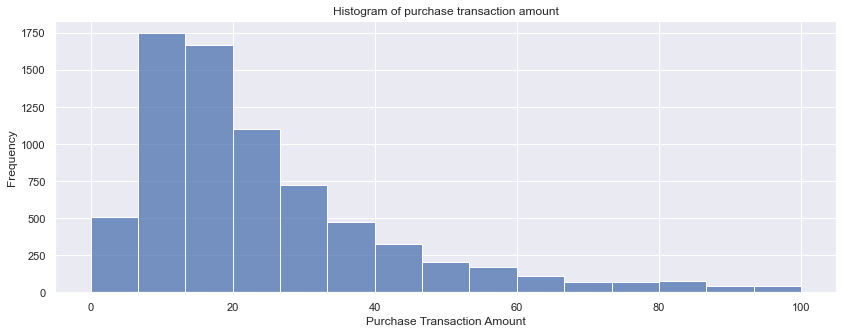

In [131]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.histplot(purchases_trans, binrange=[0, 100], bins=15, ax=ax)
plt.xlabel('Purchase Transaction Amount')
plt.ylabel('Frequency')
plt.title('Histogram of purchase transaction amount')
plt.show()

In [132]:
df[['transaction_id', 'extraction', 'weekday']].sort_values(by='extraction')

,transaction_id,extraction,weekday
0,a623070bfead4541a6b0fff8a09e706c,2018-08-01 01:01:15,3
1,13270a2a902145da9db4c951e04b51b9,2018-08-01 01:13:45,3
2,feb79e7ecd7048a5a36ec889d1a94270,2018-08-01 01:26:15,3
3,2698170da3704fd981b15e64a006079e,2018-08-01 01:38:45,3
4,329adf79878c4cf0aeb4188b4691c266,2018-08-01 01:51:15,3
...,...,...,...
12038,f2e3e695c2ee4c50a4c8747f852cbe2e,2018-10-31 23:09:06,3
12039,56e147e5485f4683b9076fcaaed76640,2018-10-31 23:21:46,3
12040,2fdd4681827343f6af2e6519644a684a,2018-10-31 23:34:25,3
12041,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,2018-10-31 23:47:05,3


In [133]:
hourly_trans = (df[['transaction_id', 'hour']].groupby('hour').count() / df.transaction_id.count()) * 100
hourly_trans = hourly_trans.reset_index()
hourly_trans

,hour,transaction_id
0,0,0.896787
1,1,1.776966
2,2,1.760359
3,3,1.627501
4,4,2.565806
5,5,1.735448
6,6,2.067591
7,7,2.208752
8,8,4.542058
9,9,9.183758


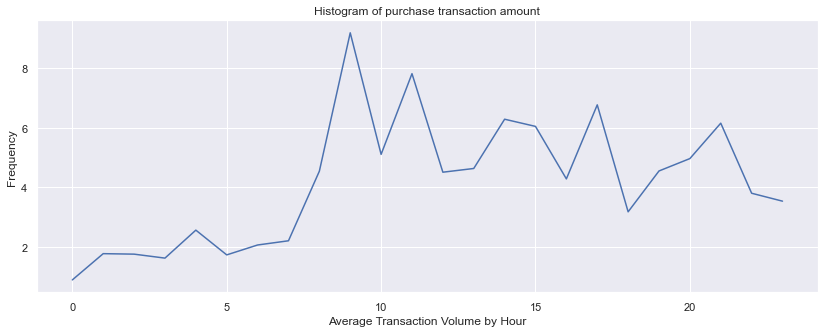

In [134]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.lineplot(data=hourly_trans, x='hour', y='transaction_id', ax=ax)
plt.xlabel('Average Transaction Volume by Hour')
plt.ylabel('Frequency')
plt.title('Histogram of purchase transaction amount')
plt.show()

In [135]:
df['extraction'].dt.isocalendar().day

0        3
1        3
2        3
3        3
4        3
        ..
12038    3
12039    3
12040    3
12041    3
12042    3
Name: day, Length: 12043, dtype: UInt32

In [136]:
df['week'] = df['extraction'].dt.isocalendar().week

In [137]:
weekly_trans = df[['transaction_id', 'week', 'weekday']].groupby(['week', 'weekday']).count().reset_index()

In [138]:
weekly_trans.groupby('weekday').mean().reset_index()

,weekday,week,transaction_id
0,1,38.000000,104.615385
1,2,38.000000,114.384615
2,3,37.500000,147.357143
3,4,37.333333,150.083333
4,5,37.000000,159.461538
5,6,37.000000,131.461538
6,7,37.000000,119.230769


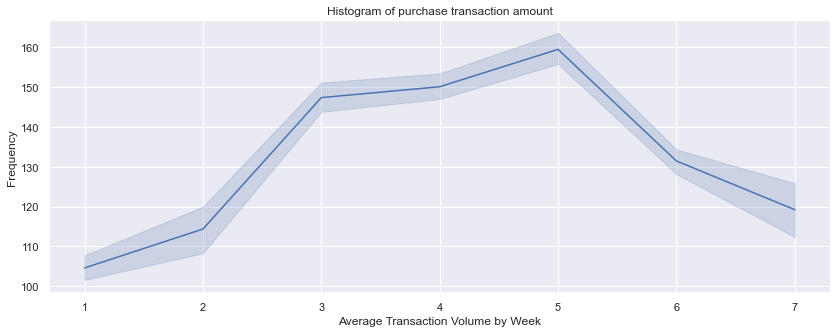

In [139]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.lineplot(data=weekly_trans, x='weekday', y='transaction_id', ax=ax)
plt.xlabel('Average Transaction Volume by Week')
plt.ylabel('Frequency')
plt.title('Histogram of purchase transaction amount')
plt.show()

In [145]:
customer_data = df[['customer_id', 'transaction_id']].groupby('customer_id').count().reset_index()

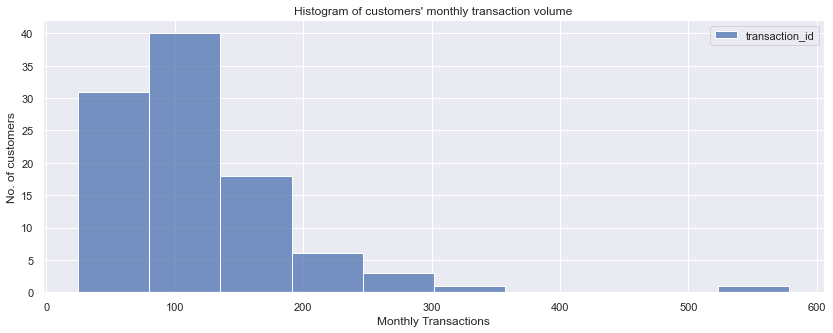

In [156]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.histplot(customer_data, bins=10, ax=ax)
plt.xlabel('Monthly Transactions')
plt.ylabel('No. of customers')
plt.title("Histogram of customers' monthly transaction volume")
plt.show()